In [38]:
import numpy as np
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
df = pd.read_csv("d612874c2dbb.csv")
from sklearn.preprocessing import StandardScaler


In [39]:

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [40]:
df[df.duplicated(keep=False)]

,YearsExperience,Salary


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
df.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [8]:
df.YearsExperience.unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [41]:
df['YearsExperience'] = df['YearsExperience'].replace({2.:2.0,3.:3.0,4.:4.0,6.:6.0,9.:9.0})

In [42]:
df['YearsExperience'] = df['YearsExperience'].replace({2.:2.0,3.:3.0,4.:4.0,6.:6.0,9.:9.0})

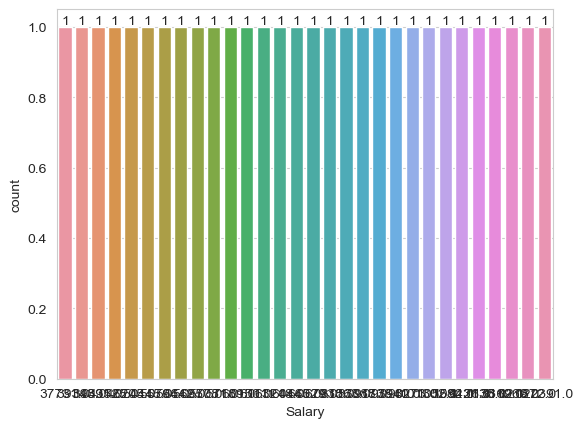

In [17]:
ax=sns.countplot(x=df['Salary']);
ax.bar_label(ax.containers[0]);

C:\Users\nick_\AppData\Local\Temp\ipykernel_6668\4271720843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Salary)


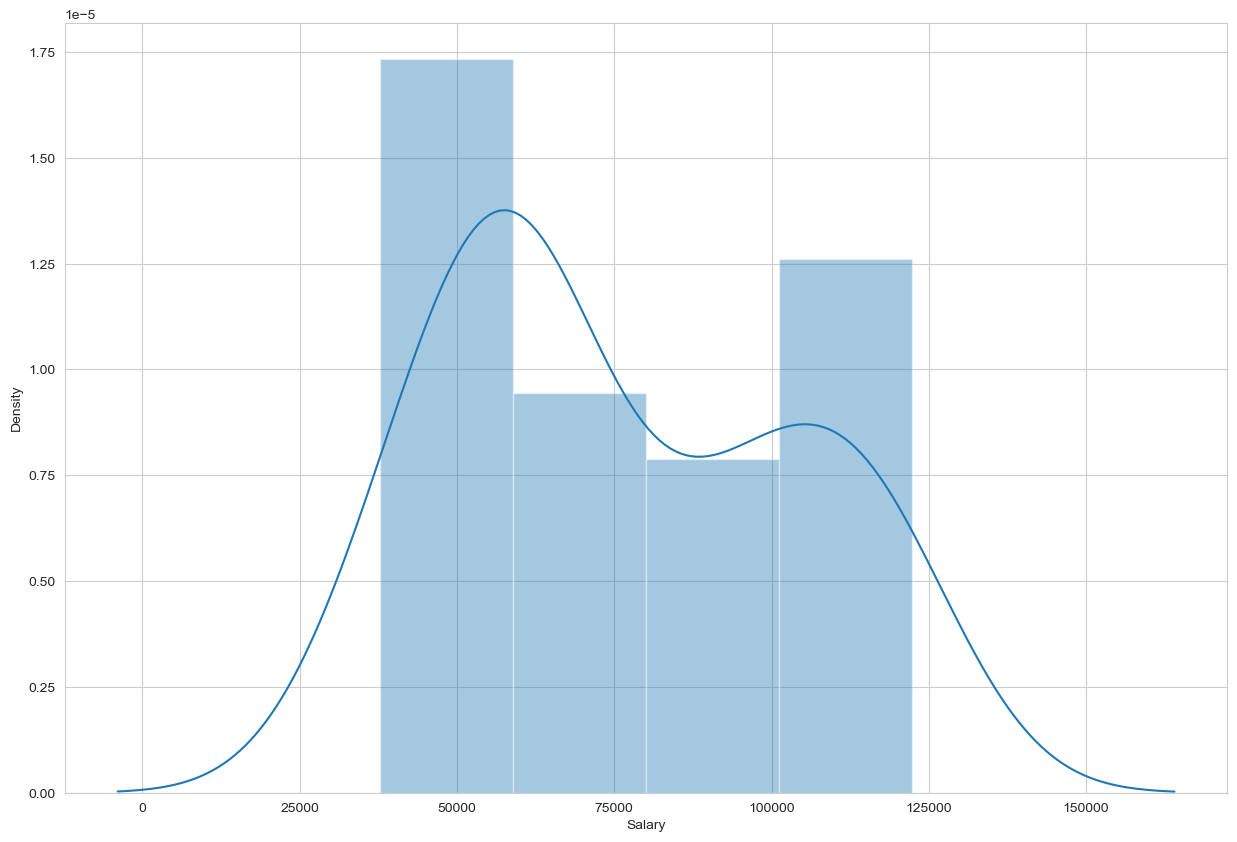

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.distplot(df.Salary)
plt.show()


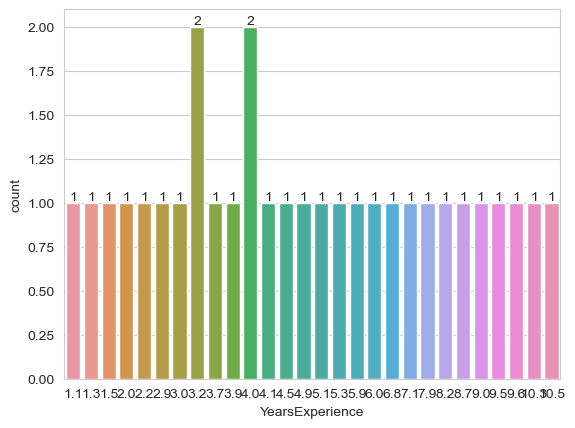

In [16]:
ax=sns.countplot(x=df['YearsExperience']);
ax.bar_label(ax.containers[0]);


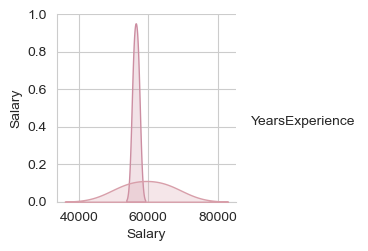

In [18]:
import seaborn as sns
sns.pairplot(df,markers=None,hue='YearsExperience')
plt.show()

In [43]:
x = df.drop(columns=['Salary'])
y = df['Salary']
x.shape

(30, 1)

In [44]:
y.shape

(30,)

In [45]:
x

In [46]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [47]:
training_score = []
testing_score = []

In [48]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f'r2_score of {model} model on Training Data is:',a)
    print(f'r2_score of {model} model on Testing Data is:',b)

In [49]:
from sklearn.linear_model import LinearRegression

model_prediction(LinearRegression())

r2_score of LinearRegression() model on Training Data is: 96.45401573418147
r2_score of LinearRegression() model on Testing Data is: 90.24461774180497


In [50]:
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())

r2_score of DecisionTreeRegressor() model on Training Data is: 99.99631319936537
r2_score of DecisionTreeRegressor() model on Testing Data is: 80.21759743735161


In [51]:
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_score of RandomForestRegressor() model on Training Data is: 99.53945493050867
r2_score of RandomForestRegressor() model on Testing Data is: 89.54620049904064


In [52]:
!pip install CatBoost

In [53]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

r2_score of <catboost.core.CatBoostRegressor object at 0x0000025308567370> model on Training Data is: 99.96425856630397
r2_score of <catboost.core.CatBoostRegressor object at 0x0000025308567370> model on Testing Data is: 81.62299340861381


In [54]:
models = ['Linear Regerssion', 'Decision Tree', 'Random Forest', 'Catboost']

In [55]:
import pandas as pd
df1 = pd.DataFrame({'Algorithms':models,
                   'Training Score':training_score,
                   'Testing Score':testing_score})
df1

,Algorithms,Training Score,Testing Score
0,Linear Regerssion,96.454016,90.244618
1,Decision Tree,99.996313,80.217597
2,Random Forest,99.539455,89.546200
3,Catboost,99.964259,81.622993


<Axes: title={'center': 'Performance Visualization of Different Models'}, xlabel='Algorithms'>

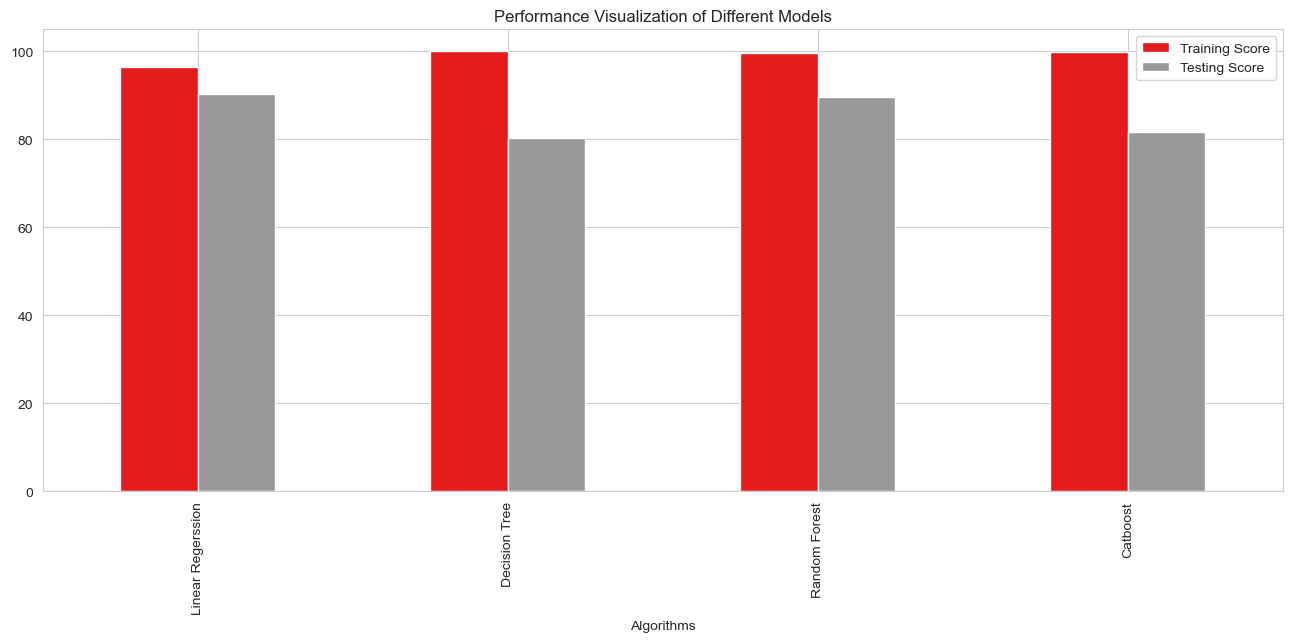

In [58]:
df1.plot(x="Algorithms",y=['Training Score','Testing Score'], figsize=(16,6),kind='bar',
        title='Performance Visualization of Different Models',colormap='Set1')